<a href="https://colab.research.google.com/github/EpachonJr/MyProjects/blob/master/Predicting_Stock_Prices_Random_Walk_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install quandl

In [0]:
quandl.ApiConfig.api_key = "s5p_etxYczuD5scaTrCV"

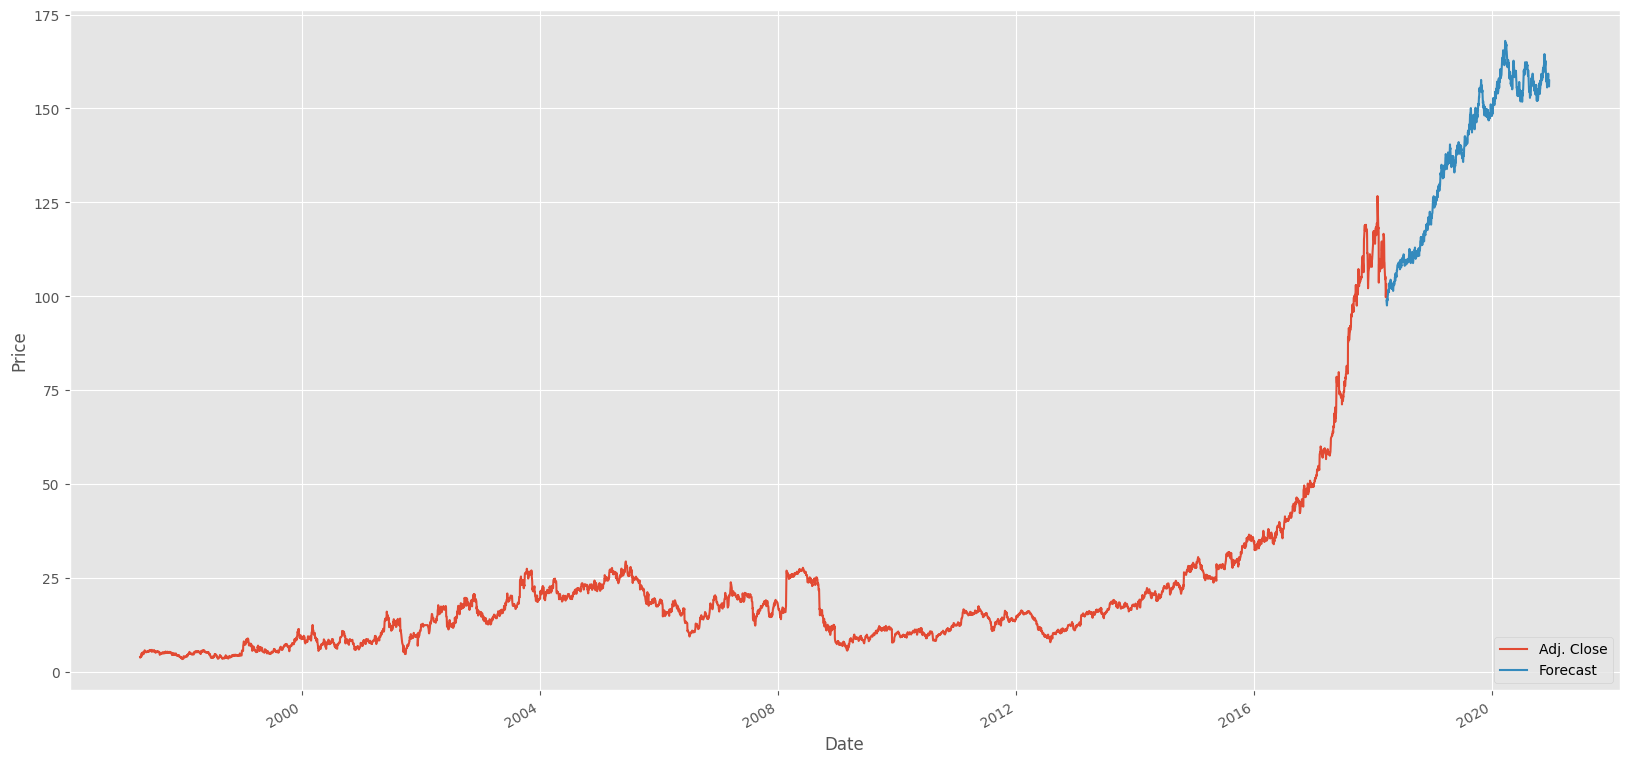

In [32]:
import quandl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
import datetime
import random

style.use('ggplot')

df = quandl.get("WIKI/TTWO")
df = df[['Adj. Close']]

df.dropna(inplace=True)

# Prepare variables for loop

last_close = df['Adj. Close'][-1]
last_date = df.iloc[-1].name.timestamp()
df['Forecast'] = np.nan

for i in range(1000):
    # Create np.Array of current predictions to serve as input for future predictions
    modifier = random.randint(-100, 105) / 10000 + 1
    last_close *= modifier
    next_date = datetime.datetime.fromtimestamp(last_date)
    last_date += 86400

    # Outputs data into DataFrame to enable plotting
    df.loc[next_date] = [np.nan, last_close]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()